In [101]:
import tensorflow

**Gerekli Kütüphanelerin İçe Aktarılması**

In [102]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
import pandas as pd

**Veri Setinin Yüklenmesi**

In [105]:
mnist_dataset=pd.read_csv("/kaggle/input/digitrecognizer/train.csv")
mnist_dataset.shape

(42000, 785)

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
mnist_dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Veri Seti Yükleme ve İlk Kontroller

Bu adımda, **Digit Recognizer** veri seti yüklenmiştir. Veri seti, 28x28 boyutunda el yazısı rakamlarının görüntüleriyle ilgili verileri içerir. Her bir örnek, 784 piksel değerine sahip olup, bu değerler düz bir şekilde sıralanmıştır. Ayrıca her örnek, bir **label (etiket)** ile eşleşir ve bu etiket, o örneğin doğru rakamını belirtir (0'dan 9'a kadar).

Örneğin:
- İlk satırdaki **label** değeri 1, bu da ilk örneğin rakam 1 olduğunu gösterir.
- Verinin geri kalanı, 28x28 boyutunda bir görüntüyü temsil eden piksel değerlerinden oluşur.

Veri seti şu şekilde görünmektedir:


In [108]:
X=mnist_dataset[mnist_dataset.columns[1:785]]
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Özelliklerin Ayrılması

Bu adımda, **X** değişkeni, **mnist_dataset** veri setindeki sadece piksel değerlerini içeren sütunları seçerek oluşturulmuştur. **mnist_dataset.columns[1:785]** ifadesi ile ilk sütun olan `label` dışındaki tüm sütunlar (pixel0'dan pixel783'e kadar) alınmıştır. Bu işlem, görüntü verilerinin özellikleri olan piksel değerlerini **X** değişkenine atamayı sağlar.

Çıktı olarak, her bir satır 28x28 boyutunda bir görüntüye ait 784 piksel değerini içeren bir dizi olarak görünmektedir. Örnek bir çıktı şu şekildedir:



**Bu, her satırın bir el yazısı rakamının piksellerini temsil ettiğini gösterir.**.


In [109]:
y=mnist_dataset[mnist_dataset.columns[0:1]]
y.head()

,label
0,1
1,0
2,1
3,4
4,0


## Etiketlerin Ayrılması

Bu adımda, **y** değişkeni, **mnist_dataset** veri setinin sadece etiket (label) sütununu içerecek şekilde oluşturulmuştur. **mnist_dataset.columns[0:1]** ifadesi ile ilk sütun olan `label` sütunu alınmıştır. Bu sütun, her bir görüntüye karşılık gelen el yazısı rakamının etiketini temsil eder.

Çıktı olarak, her bir satırda bir rakam etiketine karşılık gelen bir değer bulunmaktadır. Örnek çıktı şu şekildedir:



In [110]:
X_train, X_test, y_train, y_test = train_test_split(
  X,y , random_state=42,test_size=0.20, shuffle=True)

## Eğitim Verisinin Ayrılması

**X_train** veri seti, **train_test_split** fonksiyonu kullanılarak eğitim verileri ve etiketler arasında yapılan ayırmanın sonucudur. Bu veri seti, her bir görüntünün 784 pikselini temsil eden sütunları içerir. Bu sütunlar, her bir el yazısı rakamını modelin öğrenebilmesi için özellikler olarak kullanılır.

Örnek çıktı:



In [111]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Eğitim Verisi Şekli ve Etiketler

**X_train** ve **y_train** veri setleri, eğitim verilerini ve bu verilerin etiketlerini içerir.

- **X_train.shape**: Bu çıktı, eğitim setindeki görüntülerin boyutlarını gösterir. Burada **33600** örnek ve her örnek için **784** piksel bulunmaktadır (her görüntü 28x28 boyutlarında bir resimdir). Bu, her görüntü için 784 pikselin lineerleştirilmiş bir temsili olduğu anlamına gelir.

  Çıktı:


In [112]:
X_train.shape

(33600, 784)


- **y_train.head()**: Bu çıktı, her görüntüye karşılık gelen etiketlerin ilk 5 satırını gösterir. Etiketler, her görüntü için doğru rakamı belirtir (0-9 arası).

Örnek çıktı:


In [113]:
y_train.head()

,label
34941,6
24433,5
24432,3
8832,4
30291,7


In [114]:
y_train.shape

(33600, 1)

In [115]:
X_test.head()
X_test.shape

(8400, 784)

In [116]:
y_test.shape

(8400, 1)


**train.csv dosyasındaki veriler eğitim ve test verilerine bölünmüştür.Eğitim verisi: X_train, y_train: 33.600 kayıt içermektedir.Test verisi: X_test, y_test: 8.400 kayıt içermektedir.**








In [117]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11284,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X_train[99:100]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
print(X_train[99:100])

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
40547       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
40547       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
40547         0         0         0         0         0  

[1 rows x 784 columns]


In [120]:
print(max(X_train[99:100]))

pixel99


In [121]:
print(min(X_train[99:100]))

pixel0


**X_train['pixel100'].unique()** çıktısı, eğitim verisinin **pixel100** sütunundaki benzersiz piksel değerlerini gösterir. Bu, her bir pikselin farklı parlaklık değerlerini temsil eder ve 0 ile 255 arasındaki değerler içerir. Örneğin, 0 siyah, 255 ise beyaz renge karşılık gelir. Bu değerler, modelin görsel veriyi anlaması ve işlem yapabilmesi için önemlidir.


In [122]:
X_train['pixel100'].unique()

array([  0, 187,  32, 122, 129, 254,  64, 220,  47, 234,   9, 168, 106,
       143, 255, 179, 221, 133, 172,  10,  16,  49, 123, 253, 209, 169,
       239, 217, 103, 228, 138, 236,  12, 157, 246, 252, 233,  30, 162,
        59, 154,  56, 128, 100, 104,  26, 192, 191, 127,  76, 176, 231,
         8,  24, 144, 160, 249, 101,   3, 171, 241, 197, 182,  51, 205,
        81, 183, 139, 245,  29, 126, 121, 156, 224,  52, 195, 134, 178,
        33, 153,  97, 165, 152,  18, 113,  36,  77,   7,  48,  68,  86,
        80, 229, 188, 225,   6, 207, 175,  71,  94, 141, 105, 108,  88,
        79,  38, 146, 115, 226, 250, 198, 109,  85, 147, 193, 163,  82,
       232, 216, 237, 230,  57, 190,  95,   5,  27, 212, 238, 118, 214,
        63,  31, 244, 235, 130, 155,  69, 150,  14,   2, 218, 211, 112,
        19,  25, 203, 204,  37,  67,  11, 159, 148, 199, 135, 240, 242,
       206,  44,  13,  28,  45, 161, 181, 131, 125,  34, 189, 164,  87,
       247, 215, 194,  53,  96, 186,  60, 170, 120, 251,  40, 11

In [123]:
X_train['pixel100'].max()

255

In [124]:
X_train['pixel100'].min()

0

In [125]:
y_train['label'].unique()

array([6, 5, 3, 4, 7, 8, 0, 9, 1, 2])

In [126]:
X_train=X_train/255
X_test=X_test/255

**X_train['pixel100'].unique()** fonksiyonu, eğitim veri setindeki `pixel100` sütunundaki benzersiz piksel değerlerini döndürür. Bu değerler, **0 ile 1 arasında normalize edilmiş** parlaklık seviyelerini temsil eder. Örneğin, **0.0** tamamen siyah, **1.0** ise tamamen beyaz bir pikseli gösterir. Diğer değerler ise çeşitli gri tonlarını veya renklerin parlaklık seviyelerini temsil eder.


In [127]:
X_train['pixel100'].unique()

array([0.        , 0.73333333, 0.1254902 , 0.47843137, 0.50588235,
       0.99607843, 0.25098039, 0.8627451 , 0.18431373, 0.91764706,
       0.03529412, 0.65882353, 0.41568627, 0.56078431, 1.        ,
       0.70196078, 0.86666667, 0.52156863, 0.6745098 , 0.03921569,
       0.0627451 , 0.19215686, 0.48235294, 0.99215686, 0.81960784,
       0.6627451 , 0.9372549 , 0.85098039, 0.40392157, 0.89411765,
       0.54117647, 0.9254902 , 0.04705882, 0.61568627, 0.96470588,
       0.98823529, 0.91372549, 0.11764706, 0.63529412, 0.23137255,
       0.60392157, 0.21960784, 0.50196078, 0.39215686, 0.40784314,
       0.10196078, 0.75294118, 0.74901961, 0.49803922, 0.29803922,
       0.69019608, 0.90588235, 0.03137255, 0.09411765, 0.56470588,
       0.62745098, 0.97647059, 0.39607843, 0.01176471, 0.67058824,
       0.94509804, 0.77254902, 0.71372549, 0.2       , 0.80392157,
       0.31764706, 0.71764706, 0.54509804, 0.96078431, 0.11372549,
       0.49411765, 0.4745098 , 0.61176471, 0.87843137, 0.20392

In [128]:
X_train[0:1]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**İlk katman**: 128 nöronlu bir Dense katmanı eklenmiştir ve ReLU aktivasyon fonksiyonu kullanılmıştır. Bu katman, doğrusal olmayan özellikleri öğrenmeye yardımcı olur.

**Çıktı katmanı**: 10 nöronlu bir Dense katmanı eklenmiştir ve Softmax aktivasyon fonksiyonu kullanılmıştır. MNIST veri setindeki 10 sınıfı temsil eden bu katman, her sınıf için bir olasılık değeri döndürür.


In [129]:
model=Sequential()

In [130]:
model.add(Dense(128,activation='relu'))

In [131]:
model.add(Dense(10,activation='softmax'))

In [132]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [133]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [134]:
history=model.fit(X_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8143 - loss: 0.6702 - val_accuracy: 0.9368 - val_loss: 0.2352
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9403 - loss: 0.2091 - val_accuracy: 0.9513 - val_loss: 0.1780
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9582 - loss: 0.1435 - val_accuracy: 0.9583 - val_loss: 0.1443
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9696 - loss: 0.1045 - val_accuracy: 0.9628 - val_loss: 0.1316
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9744 - loss: 0.0883 - val_accuracy: 0.9676 - val_loss: 0.1184
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9813 - loss: 0.0692 - val_accuracy: 0.9698 - val_loss: 0.1090
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9861 - loss: 0.0556 - val_accuracy: 0.9695 - val_loss: 0.1053
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9878 - loss: 0.0451 - val_accuracy: 0.

In [135]:
model.evaluate(X_test,y_test)

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9689 - loss: 0.1131


[0.10531105101108551, 0.9692857265472412]

In [139]:
mnist_dataset_test=pd.read_csv("/kaggle/input/mssdfd/test.csv")
mnist_dataset_test.shape

(28000, 784)

In [140]:
mnist_dataset_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
mnist_dataset_test=mnist_dataset_test/255

In [142]:
mnist_dataset_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<class 'numpy.ndarray'>


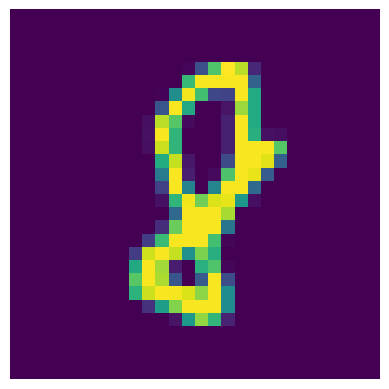

      label
5457      8
<class 'numpy.ndarray'>


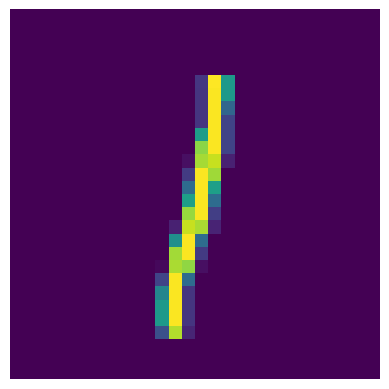

       label
38509      1
<class 'numpy.ndarray'>


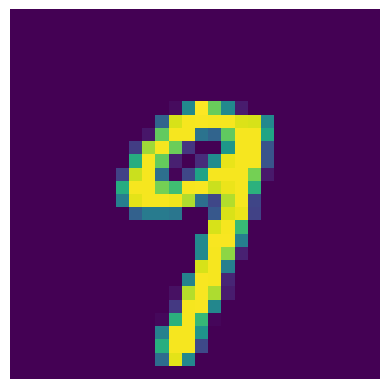

       label
25536      9
<class 'numpy.ndarray'>


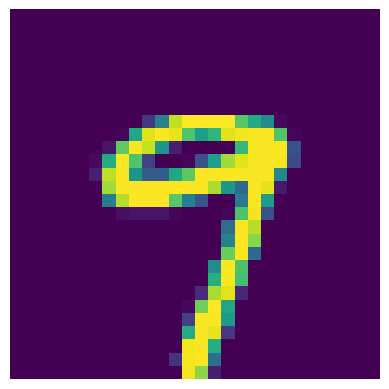

       label
31803      9
<class 'numpy.ndarray'>


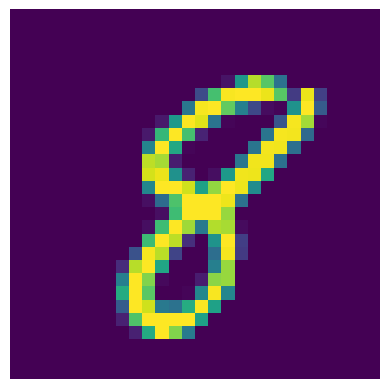

       label
39863      8
<class 'numpy.ndarray'>


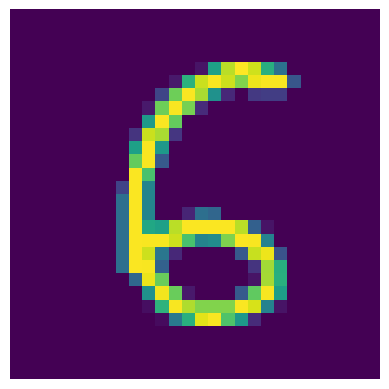

       label
30639      6
<class 'numpy.ndarray'>


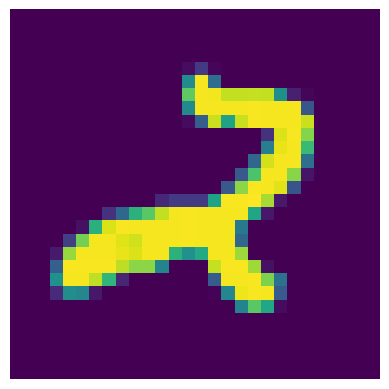

       label
12986      2
<class 'numpy.ndarray'>


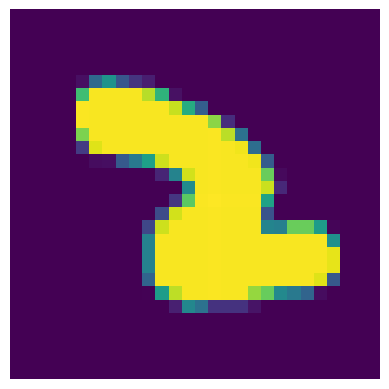

       label
41067      2
<class 'numpy.ndarray'>


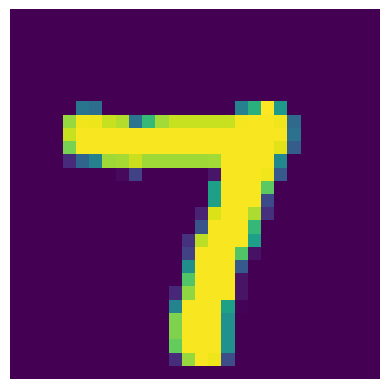

       label
30743      7
<class 'numpy.ndarray'>


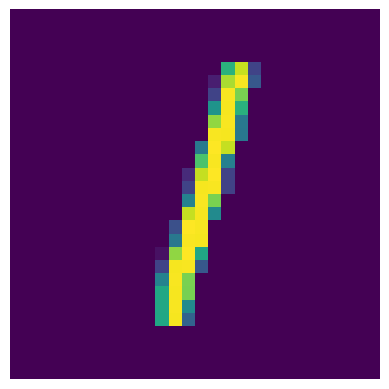

      label
6839      1


In [144]:
# Bu döngü, test setindeki ilk 10 örneği görselleştirecek.
# Her örnek için, veriyi numpy dizisine dönüştürüp, 28x28 boyutlarına yeniden şekillendirerek görselleştiriyoruz.
# Görselleştirmede, eksenler gizleniyor ve her bir resmin etiketi (yani gerçek sınıf numarası) yazdırılıyor.

for i in range(10):
    data = X_test[i:i+1].to_numpy()  # Test setinden i. örneği numpy dizisine dönüştür
    print(type(data))  # Veri tipini yazdır (numpy.ndarray)
    plt.imshow(data.reshape(28, 28))  # Veriyi 28x28 boyutlarında görselleştir
    plt.axis("off")  # Eksenleri gizle
    plt.show()  # Resmi göster
    print(y_test[i:i+1])  # İlgili etiket (gerçek sınıf) bilgisini yazdır


## Tahmin Sonuçları Oluşturma

Bu kod parçası, modelin test verisi üzerinde yaptığı tahminleri toplayarak, her bir görüntü için tahmin edilen etiketle birlikte bir sonuç tablosu oluşturur. Aşağıdaki adımlar izlenir:

1. **Model ile Tahmin Yapma**: 
   - Model, test veri setindeki her bir örnek için 10 sınıfın olasılıklarını döndürür.
   - `preds = model.predict(mnist_dataset_test)` ile modelin tahminleri alınır.

2. **Tahmin Sonuçlarının DataFrame'e Dönüştürülmesi**:


In [145]:
preds = model.predict(mnist_dataset_test)
results = pd.DataFrame(preds)
results['label'] = results.idxmax(axis = 1)
results['row_index'] = results.index +1
df = pd.DataFrame({
    'ImageId': results['row_index'],
    'label': results['label']
})

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [146]:
df.to_csv('submission.csv', index=False)